# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

## The Procedure:
We already have the preprocessed data but in it some features are numerical, categorical and some are textual. 
Categorical features are to be one hot encoded.
Numerical features are to be normalized.
Textual features are to be converted into vectors either by following the BOW (CountVectorizer) or tfidf (TfidfVectorizer)

Now your data is all in numerical form, which the machine can read. The model is ready to be trained. 

Now classification models that we are using for this task is Naive Bayes, for which the hyperparameter is alpha. 

I will be referencig the following link to run my tfidf model: https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\anshi\Downloads\preprocessed_data.csv", nrows=50000)
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [2]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [3]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


### BOW
<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
bow_features=[]

### BOW
<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)
print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)
for i in vectorizer.get_feature_names():
    bow_features.append(i)
print(len(bow_features))

(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)
5000


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    bow_features.append(i)
print(len(bow_features))

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
5051


In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    bow_features.append(i)
print(len(bow_features))

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
5056


In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    bow_features.append(i)
print(len(bow_features))

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
5060


In [9]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [10]:
bow_features.append("price")
print(len(bow_features))

5061


In [11]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projectcount_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projectcount_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projectcount_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_projectcount_norm.shape, y_train.shape)
print(X_cv_projectcount_norm.shape, y_cv.shape)
print(X_test_projectcount_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [12]:
bow_features.append("teacher_number_of_previously_posted_projects")
print(len(bow_features))

5062


In [13]:
len(bow_features)

5062

In [14]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_projectcount_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_projectcount_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_projectcount_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 5062) (22445,)
(11055, 5062) (11055,)
(16500, 5062) (16500,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

100%|██████████| 14/14 [00:00<00:00, 20.95it/s]


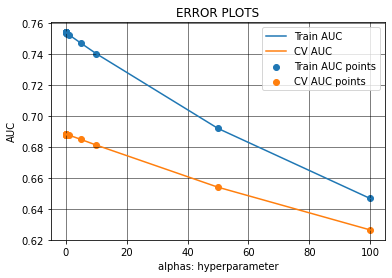

In [15]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
from tqdm import tqdm

train_auc = []
cr_auc = [] 
alpha= [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

for i in tqdm(alpha):
    neigh = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    neigh.fit(X_tr, y_train)

    y_train_pred = neigh.predict_proba(X_tr)[:,1]    
    y_cr_pred = neigh.predict_proba(X_cr)[:,1]    
    #roc_auc_score(y_val, y_pred) The roc_auc_score always runs from 0 to 1,
    #and is sorting predictive possibilities. 0.5 is the baseline for random guessing, so you want to always get above 0.5.
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cr_auc.append(roc_auc_score(y_cv, y_cr_pred))
  
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cr_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cr_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alphas: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [16]:
alpha1=50
print("Now we are considering alpha to be 50, we will validate this by trainig a new model with this value of alpha and check it on test data")

Now we are considering alpha to be 50, we will validate this by trainig a new model with this value of alpha and check it on test data


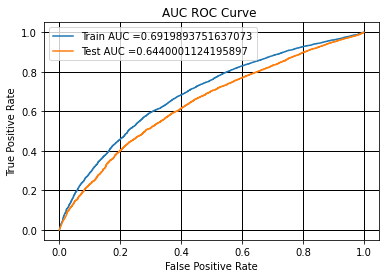

In [17]:
from sklearn.metrics import roc_curve, auc

neigh = MultinomialNB(alpha=alpha1,class_prior=[0.5,0.5])

neigh.fit(X_tr, y_train)

y_train_pred = neigh.predict_proba(X_tr)[:,1]     
y_test_pred = neigh.predict_proba(X_te)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve ")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [18]:
import numpy as np
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),3), "for threshold", np.round(t,3))
    return t

In [19]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [20]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Threshold", best_t)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)).ravel())
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("tn, fp, fn, tp", "=", confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)).ravel())
#print("here the threshold is ", np.round(best_t,3) , "i can change the threshold values according to Requirement in the confusion meterix")

the maximum value of tpr*(1-fpr) 0.417 for threshold 1.0
Threshold 0.9999805683398424
Train confusion matrix
[[ 2539  1056]
 [ 7725 11125]]
tn, fp, fn, tp = [ 2539  1056  7725 11125]
Test confusion matrix
[[1690  952]
 [5830 8028]]
tn, fp, fn, tp = [1690  952 5830 8028]


In [21]:
cf_train= pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
cf_test = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

<AxesSubplot:>

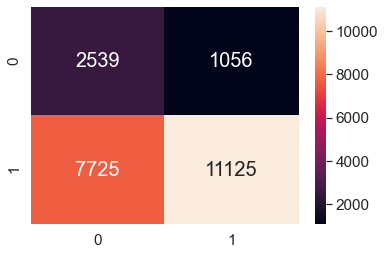

In [22]:
import seaborn as sns
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_train,annot=True, annot_kws={"size": 20},fmt ="g")

<AxesSubplot:>

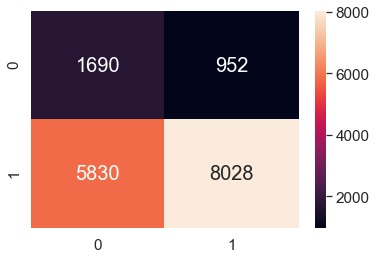

In [23]:
import seaborn as sns
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_test,annot=True, annot_kws={"size": 20},fmt ="g")

https://stackoverflow.com/questions/54988116/why-am-i-getting-almost-same-top-10-features-using-multinomial-naive-bayes-class

In [26]:
sorted_idx=[]
Positives=[]
sorted_idx = np.argsort(-1 * neigh.feature_log_prob_[1] )[0:5063]
print("-----------top 20 features for BOW positive classification--------------")
for i in sorted_idx[:20]:
    print(bow_features[i])
    Positives.append(bow_features[i])

-----------top 20 features for BOW positive classification--------------
students
school
my
classroom
learning
the
not
they
learn
my students
help
price
many
nannan
work
we
reading
need
use
day


In [27]:
sorted_idx=[]
Negatives=[]
print("-----------top 20 features for BOW negative classification--------------")

sorted_idx = np.argsort(-1 * neigh.feature_log_prob_[0] )[0:5063]
for i in sorted_idx[:20]:
    print(bow_features[i])
    Negatives.append(bow_features[i])

-----------top 20 features for BOW negative classification--------------
students
school
learning
my
classroom
not
learn
they
help
the
my students
price
many
nannan
need
we
work
come
year
teacher_number_of_previously_posted_projects


In [28]:
P_as_set=set(Positives)
Intersection=P_as_set.intersection(Negatives)
I_as_list=list(Intersection)
print("----List of features that are common for both positive and negative classification----------")
print(I_as_list)
print("Total common features:",len(I_as_list))

----List of features that are common for both positive and negative classification----------
['price', 'learning', 'help', 'school', 'my students', 'nannan', 'not', 'my', 'learn', 'work', 'we', 'they', 'classroom', 'many', 'students', 'the', 'need']
Total common features: 17


## TFIDF

In [29]:
data.columns
y=data.project_is_approved
X=X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [45]:
# train test split
# in this case I will be using the grid search and thus wont be needing the cv data. 
from sklearn.model_selection import train_test_split
Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(X, y, test_size=0.33, stratify=y)
tfidf_features=[]
print(Xtf_train.shape)
print(Xtf_test.shape)
print(ytf_train.shape)
print(ytf_test.shape)

(33500, 8)
(16500, 8)
(33500,)
(16500,)


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(Xtf_train['essay'].values) # fit has to happen only on train data

Xtf_train_essay = vectorizer.transform(Xtf_train['essay'].values)
Xtf_test_essay = vectorizer.transform(Xtf_test['essay'].values)

print("After vectorizations")
print(Xtf_train_essay.shape, ytf_train.shape)
print(Xtf_test_essay.shape, ytf_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(33500, 10371) (33500,)
(16500, 10371) (16500,)
10371


In [47]:

vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(Xtf_train['clean_categories'].values) # fit has to happen only on train data

Xtf_train_cc = vectorizer.transform(Xtf_train['clean_categories'].values)
Xtf_test_cc = vectorizer.transform(Xtf_test['clean_categories'].values)

print("After vectorizations")
print(Xtf_train_cc.shape, ytf_train.shape)
print(Xtf_test_cc.shape, ytf_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(33500, 7) (33500,)
(16500, 7) (16500,)
10378


In [48]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(Xtf_train['clean_subcategories'].values) # fit has to happen only on train data

Xtf_train_csc = vectorizer.transform(Xtf_train['clean_subcategories'].values)
Xtf_test_csc = vectorizer.transform(Xtf_test['clean_subcategories'].values)

print("After vectorizations")
print(Xtf_train_csc.shape, ytf_train.shape)
print(Xtf_test_csc.shape, ytf_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(33500, 28) (33500,)
(16500, 28) (16500,)
10406


In [49]:
vectorizer = CountVectorizer()
vectorizer.fit(Xtf_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
Xtf_train_state_ohe = vectorizer.transform(Xtf_train['school_state'].values)
Xtf_test_state_ohe = vectorizer.transform(Xtf_test['school_state'].values)

print("After vectorizations")
print(Xtf_train_state_ohe.shape, y_train.shape)
print(Xtf_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(33500, 51) (22445,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
10457


In [50]:
vectorizer = CountVectorizer()
vectorizer.fit(Xtf_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
Xtf_train_teacher_ohe = vectorizer.transform(Xtf_train['teacher_prefix'].values)
Xtf_test_teacher_ohe = vectorizer.transform(Xtf_test['teacher_prefix'].values)

print("After vectorizations")
print(Xtf_train_teacher_ohe.shape, y_train.shape)
print(Xtf_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(33500, 5) (22445,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
10462


In [51]:

vectorizer = CountVectorizer()
vectorizer.fit(Xtf_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
Xtf_train_grade_ohe = vectorizer.transform(Xtf_train['project_grade_category'].values)
Xtf_test_grade_ohe = vectorizer.transform(Xtf_test['project_grade_category'].values)

print("After vectorizations")
print(Xtf_train_grade_ohe.shape, y_train.shape)
print(Xtf_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
for i in vectorizer.get_feature_names():
    tfidf_features.append(i)
print(len(tfidf_features))

After vectorizations
(33500, 4) (22445,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
10466


In [52]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(Xtf_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

Xtf_train_projectcount_norm = normalizer.transform(Xtf_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
Xtf_test_projectcount_norm = normalizer.transform(Xtf_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(Xtf_train_projectcount_norm.shape, y_train.shape)
print(Xtf_test_projectcount_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (22445,)
(16500, 1) (16500,)


In [53]:
tfidf_features.append("teacher_number_of_previously_posted_projects")

In [54]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(Xtf_train['price'].values.reshape(-1,1))

Xtf_train_price_norm = normalizer.transform(Xtf_train['price'].values.reshape(-1,1))
Xtf_test_price_norm = normalizer.transform(Xtf_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(Xtf_train_projectcount_norm.shape, y_train.shape)
print(Xtf_test_projectcount_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (22445,)
(16500, 1) (16500,)


In [55]:
tfidf_features.append("price")

In [56]:
len(tfidf_features)

10468


#### Features that I am gonna use for this model:
Xtf_train_essay, Xtf_train_cc, Xtf_train_csc, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_projectcount_norm


Xtf_test_essay, Xtf_test_cc,Xtf_test_csc, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_projectcount_norm


In [57]:
Xtf_tr = hstack((Xtf_train_essay, Xtf_train_cc, Xtf_train_csc, Xtf_train_state_ohe, Xtf_train_teacher_ohe, Xtf_train_grade_ohe, Xtf_train_price_norm,Xtf_train_projectcount_norm)).tocsr()
Xtf_te = hstack((Xtf_test_essay, Xtf_test_cc,Xtf_test_csc, Xtf_test_state_ohe, Xtf_test_teacher_ohe, Xtf_test_grade_ohe, Xtf_test_price_norm,Xtf_test_projectcount_norm)).tocsr()

print("Final Data matrix")
print(Xtf_tr.shape, ytf_train.shape)
print(Xtf_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 10468) (33500,)
(16500, 10468) (16500,)


---Data is ready to be trained but we still dont have a hyperparameter---

https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

grid_values = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = MultinomialNB()

nbModel_grid = GridSearchCV(estimator=clf, param_grid=grid_values,scoring='roc_auc',verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(Xtf_tr, ytf_train)
print("*Drum Rolls for the optimal alpha*")
print(nbModel_grid.best_estimator_)
print(nbModel_grid.best_params_)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
*Drum Rolls for the optimal alpha*
MultinomialNB(alpha=0.1)
{'alpha': 0.1}


---alpha picked is as above---

      0      1
0  3894   1471
1  7983  20152
      0     1
0   895  1747
1  4914  8944


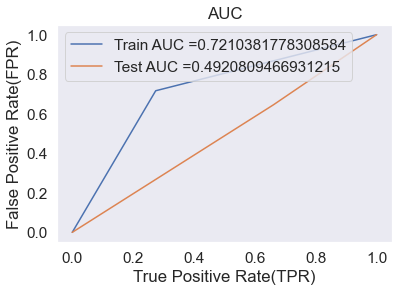

In [59]:
clf = MultinomialNB(alpha = 0.1,class_prior=[0.5,0.5])
clf.fit(Xtf_tr, ytf_train)

cf_tfidf_train= pd.DataFrame(confusion_matrix(ytf_train, clf.predict(Xtf_tr)))
print(cf_tfidf_train)
cf_tfidf_test= pd.DataFrame(confusion_matrix(y_test, clf.predict(Xtf_te)))
print(cf_tfidf_test)
train_tf_fpr, train_tf_tpr, tr_tf_thresholds = roc_curve(ytf_train, clf.predict(Xtf_tr))
test_tf_fpr, test_tf_tpr, te_tf_thresholds = roc_curve(y_test, clf.predict(Xtf_te))

plt.plot(train_tf_fpr, train_tf_tpr, label="Train AUC ="+str(auc(train_tf_fpr, train_tf_tpr)))
plt.plot(test_tf_fpr, test_tf_tpr, label="Test AUC ="+str(auc(test_tf_fpr, test_tf_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

https://stackoverflow.com/questions/54988116/why-am-i-getting-almost-same-top-10-features-using-multinomial-naive-bayes-class

In [60]:
sorted_idx=[]
Positives=[]
print("------List of top 20 TFIDF features for positive classification--------")
sorted_idx = np.argsort(-1 * neigh.feature_log_prob_[1] )[0:10420]
for i in sorted_idx[:20]:
    print(tfidf_features[i])
    Positives.append(tfidf_features[i])

------List of top 20 TFIDF features for positive classification--------
galaxy
fairly
displaying
arrange
cross
helpful
drill
hockey
crafting
distinguish
commented
isd
deserved
documentaries
inspirational
individual
exceptionalities
dojo
immeasurable
being


In [61]:
sorted_idx=[]
Negatives=[]
print("------List of top 20 TFIDF features for negative classification--------")

sorted_idx = np.argsort(-1 * neigh.feature_log_prob_[0] )[0:10420]
for i in sorted_idx[:20]:
    print(tfidf_features[i])
    Negatives.append(tfidf_features[i])

------List of top 20 TFIDF features for negative classification--------
galaxy
fairly
cross
displaying
arrange
drill
crafting
hockey
commented
helpful
distinguish
isd
deserved
documentaries
dojo
individual
inspirational
athletic
interactions
island


In [62]:
P_as_set=set(Positives)
print("----------------List of common features for both positive and negative features---------------")
Intersection=P_as_set.intersection(Negatives)
I_as_list=list(Intersection)
print(I_as_list)
print("Total common features", len(I_as_list))

----------------List of common features for both positive and negative features---------------
['galaxy', 'arrange', 'drill', 'documentaries', 'isd', 'helpful', 'individual', 'cross', 'displaying', 'hockey', 'dojo', 'inspirational', 'distinguish', 'commented', 'crafting', 'deserved', 'fairly']
Total common features 17


<AxesSubplot:>

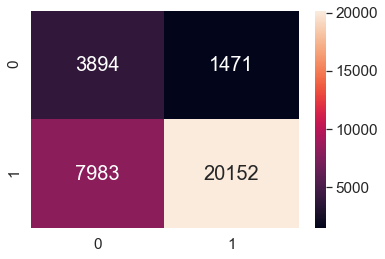

In [63]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_tfidf_train,annot=True, annot_kws={"size": 20},fmt ="g")

<AxesSubplot:>

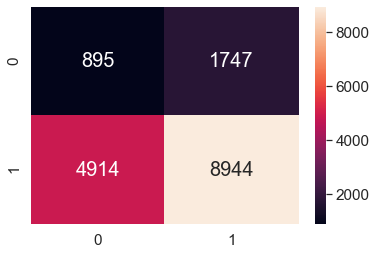

In [64]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(cf_tfidf_test,annot=True, annot_kws={"size": 20},fmt ="g")

In [66]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", " Test AUC"]
x.add_row(["BOW", "Naive Bayes", 50, 0.64])
x.add_row(["TFIDF", "Naive Bayes", 0.01, 0.49 ])

print(x)

+------------+-------------+-----------------------+-----------+
| Vectorizer |    Model    | Alpha:Hyper Parameter |  Test AUC |
+------------+-------------+-----------------------+-----------+
|    BOW     | Naive Bayes |           50          |    0.64   |
|   TFIDF    | Naive Bayes |          0.01         |    0.49   |
+------------+-------------+-----------------------+-----------+
